# I. Data collection

Importing the needed libraries:

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from networkx.readwrite import json_graph
from math import inf
from itertools import product

Let's start! Open and read the file from: http://users.diag.uniroma1.it/challenge9/download.shtml

In [3]:
with open('USA-road-d.CAL.gr', 'r') as fs: 
    cont1 = fs.readlines()
        
with open('USA-road-d.CAL.co', 'r') as fs: 
    cont2 = fs.readlines()

with open('USA-road-t.CAL.gr', 'r') as fs: 
    cont3 = fs.readlines()

Because the first lines does not have any useful information here we take only the lines we need:

In [4]:
cont1 = cont1[7:]
cont2 = cont2[7:]
cont3 = cont3[7:]

We decided that each person of the group do both backend and frontend of each functionality and we are going to show them in order.

# II. Implementation of the backend - III. Implementation of the frontend

## Functionality I - Find the Neighbours! - Visualization I - Visualize the Neighbours!

#### I create a list and then use it in the dataframe.

In [5]:
distance= []
for i in range( len(cont)):
    distance.append(list(map(int,cont1[i][2:-1].split())))


coord= []
for i in range(len(cont2)):
    coord.append(list(map(int,cont2[i][2:-1].split())))


time= []
for i in range( len(cont3)):
    time.append(list(map(int,cont3[i][2:-1].split())))

#### Create the Dataframe

In [6]:
dist=pd.DataFrame(distance, columns= ['id_node1', 'id_node2', 'Distance'])

time=pd.DataFrame(time, columns= ['Node1', 'Node2', 'Time'])

coord=pd.DataFrame(coord, columns= ['Node', 'Latitude', 'Longitude'])

#### Here I'm create the main dataframe with nodes, time, distance and add the network distance(=1) 

In [10]:
df = time.join(dist['Distance'])
df['Network'] = 1
df.head()

,Node1,Node2,Time,Distance,Network
0,1,1048577,1139,456,1
1,1048577,1,1139,456,1
2,2,1048578,5972,2389,1
3,1048578,2,5972,2389,1
4,3,1048579,895,358,1


#### Ok, let's start to set up our Graph with NetworkX

In [11]:
G = nx.DiGraph() #I use DiGraph for have all combination of possible node.

In [12]:
G.add_nodes_from(list(df['Node1'])) # Add nodes starting from the fisrt column of the Main Dataframe(df)

#### This is an important part. I add edges with this structure: (node1, node2){t: - , d: - ,n: -}
Now all the edges have as attribute the information taken from the columns of the main dataframe time, distance and network

In [13]:
for index, row in df.iterrows():
    node1 = row[0]
    node2 = row[1]
    time = row[2]
    distance = row[3]
    net = row[4]
    G.add_edge(node1, node2, t = time, d = distance, n = net)


In [14]:
nx.info(G)# some usefull info

'Name: \nType: DiGraph\nNumber of nodes: 1890815\nNumber of edges: 4630444\nAverage in degree:   2.4489\nAverage out degree:   2.4489'

In [15]:
G[1048577] #if we search a single node we find neighbours with all the information around the edges.

AtlasView({1: {'t': 1139, 'd': 456, 'n': 1}, 1766: {'t': 19179, 'd': 7672, 'n': 1}, 1767: {'t': 12653, 'd': 5061, 'n': 1}})

In [16]:
G.edges[1,1048577]['t'] #the command for reserch one single values in edges

1139

In [17]:
G[1048577][1]['t'] #the command for reserch one single values in nodes

1139

### Write a function who take all nodes connected with the selected
Is important specify: the starting node, the threshold and the type of distance.

In [100]:
def Neighbours(G, start, tresh, typeofd): #fusction with Main Graph, the starting node, the threshold and the type of distance
    l = []
    for val in G[start]:
    
        if G[start][val][typeofd] <= tresh: # create a condition to take all Neighbours with specific information
            l.append(val)
    
    return l

def draw_graph(G,n): #create a function for drawing the graph
    g = G.subgraph(n)
    p = nx.spring_layout(g)
    nx.draw_networkx_nodes(g, p, node_size=500, node_color='salmon')
    nx.draw_networkx_labels(g, p)
    plt.show()    
    

#### Implement the sistem that takes the principal inputs

Choose a node:


 45666


Chose a threshold:


 2345


Select a number for the Type Of Distance: 
 1 = Time
 2 = Distance
 3 = Network



 3


The neighbours are ---->  [1085271, 1085274, 1085275, 45671]


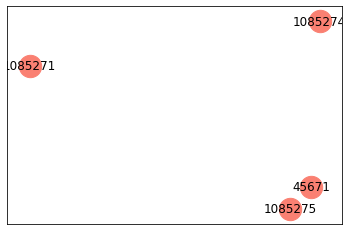

In [101]:
while True: 
    try:
        
        print('Choose a node:')
        start = int(input())
        print('Chose a threshold:')
        tresh = int(input())
        print('Select a number for the Type Of Distance: \n', '1 = Time\n', '2 = Distance\n', '3 = Network\n')
        typeofd = int(input())
        if typeofd == 1:
            typeofd = 't'
        if typeofd == 2: 
            typeofd = 'd'
        else: 
            typeofd = 'n'
        Out = Neighbours(G, start, tresh, typeofd)
        if len(Out) == 0:
            print("No neighbours with this treshold, sorry!")
            
        else:
            print('The neighbours are ----> ', Out)
            draw_graph(G, Out)
            
    except ValueError:
        print("Sorry, I didn't understand that.")
        continue
    break


## Functionality II - Find the smartest Network! - Visualization II - Visualize the smartest Network!

### Function II - Find the smartest Network!

It takes in input:

-a set of nodes v = {v_1, ..., v_n}
-One of the following distances function: t(x,y), d(x,y) or network distance (i.e. consider all edges to have weight equal to 1).

We had to mplement an algorithm that returns the set of roads (edges) that enable the user to visit all the places. We want this set to be the ones whose sum of distances is minimum.

As a dummy example, a set of input could be {Colosseo, Piazza Venezia, Piazza del Popolo} and therefore the associated set of streets will be {Via dei Fori Imperiali, Via del Corso}.

cleaning the rest of the data

In [4]:
cont1 = [list(map(int,x[2:-1].split())) for x in cont1]
cont2 = [list(map(int,x[2:-1].split())) for x in cont2]
cont3 = [list(map(int,x[2:-1].split())) for x in cont3]

making distance dataframe that hase node1, node2 and their distance 

In [5]:
dist = pd.DataFrame(cont1, columns= ['Node1', 'Node2', 'dist'])
dist.head()

,Node1,Node2,dist
0,1,1048577,456
1,1048577,1,456
2,2,1048578,2389
3,1048578,2,2389
4,3,1048579,358


making coordination dataframe that hase node, it's latitude and longtitude

In [6]:
coord=pd.DataFrame(cont2, columns= ['node', 'latitude', 'longitude'])
coord.head()

,node,latitude,longitude
0,1,-114315309,34133550
1,2,-114223946,34176221
2,3,-114307299,34148791
3,4,-114318765,34138889
4,5,-114347300,34042614


making time-distance dataframe that hase node1, node2 and time-distance between these 2 nodes

In [7]:
timedist=pd.DataFrame(cont3, columns= ['Node1', 'Node2', 'tdist'])
timedist.head()

,Node1,Node2,tdist
0,1,1048577,1139
1,1048577,1,1139
2,2,1048578,5972
3,1048578,2,5972
4,3,1048579,895


#### merging the dataframes

In order to have a main dataframe we are merging the 2 timedist_id and dist_id dataframes with having keys of edge_id and doing the inner join to have all the nodes:

In [8]:
time_dist = pd.merge(left=timedist, right=dist, left_on=['Node1', 'Node2'], right_on=['Node1', 'Node2'], how='inner')


In [9]:
time_dist.head()

,Node1,Node2,tdist,dist
0,1,1048577,1139,456
1,1048577,1,1139,456
2,2,1048578,5972,2389
3,1048578,2,5972,2389
4,3,1048579,895,358


merging the new dataframe with coord dataframe with having keys of Node2 and node, doing the left join and giving the suffixes for having appropriate names.

In [10]:
time_dist_coord = pd.merge(left=time_dist, right=coord, left_on='Node2', right_on='node', how='left', suffixes=('_1','_2'))
time_dist_coord = pd.merge(left=time_dist_coord, right=coord, left_on='Node1', right_on='node', how='left', suffixes=('_1','_2'))
del time_dist_coord['node_1'], time_dist_coord['node_2'] # delete the columns that we don't need

In [11]:
time_dist_coord.head()

,Node1,Node2,tdist,dist,latitude_1,longitude_1,latitude_2,longitude_2
0,1,1048577,1139,456,-114315049,34133899,-114315309,34133550
1,1048577,1,1139,456,-114315309,34133550,-114315049,34133899
2,2,1048578,5972,2389,-114225874,34177662,-114223946,34176221
3,1048578,2,5972,2389,-114223946,34176221,-114225874,34177662
4,3,1048579,895,358,-114307643,34148640,-114307299,34148791


##### Getting input(set of nodes and one of the distances function) from user:

In [12]:
input_nodes = [int(x) for x in input("please enter nubers in range 1 to 1890815: ").split()]

please enter nubers in range 1 to 1890815: 8 20 60


In [35]:
input_type_distance = input("please enter dist if you want the phisical distance, or tdist for time-distance: ")

please enter dist if you want the phisical distance, or tdist for time-distance: dist


Now we are going to make a treshhold in order to have just the nodes in the area of latitude and longtitude of the nodes we need (not all the nodes! because it will help us with running time):

In [18]:
input_data=coord[[x in input_nodes for x in coord['node'].values]]

To become aware of the maximum and minimum of the latitude and longtitude to make our safe area:

In [19]:
maxmin=input_data.agg(['min','max'])
maxmin

,node,latitude,longitude
min,8,-114506838,33949492
max,60,-114347268,34028261


In [20]:
treshhold = coord[(coord['latitude'] >= (maxmin.at["min","latitude"]-50000)) & 
                  (coord['latitude'] <= (maxmin.at["max","latitude"]+50000)) & 
                  (coord['longitude'] >= (maxmin.at["min","longitude"]-50000)) & 
                  (coord['longitude'] <= (maxmin.at["max","longitude"]+50000))]
treshhold.head()

,node,latitude,longitude
4,5,-114347300,34042614
5,6,-114347162,34058931
7,8,-114347268,34028261
8,9,-114340613,34042519
9,10,-114324855,34042664


In [34]:
len(treshhold)

638

In [22]:
nides_list=list(treshhold['node']) # the nodes we need to work on

In [23]:
needed_nodes = time_dist_coord[(time_dist_coord.Node1.isin(nides_list))&(time_dist_coord.Node2.isin(nides_list))]
needed_nodes # the main dataframe for the nodes we need 

,Node1,Node2,tdist,dist,latitude_1,longitude_1,latitude_2,longitude_2
8,5,6,45332,18133,-114347162,34058931,-114347300,34042614
9,6,5,45332,18133,-114347300,34042614,-114347162,34058931
12,8,1048581,37360,14944,-114347287,34041709,-114347268,34028261
13,1048581,8,37360,14944,-114347268,34028261,-114347287,34041709
14,9,1048583,25122,10049,-114329701,34042645,-114340613,34042519
...,...,...,...,...,...,...,...,...
2293455,494947,505388,26904,10761,-114489969,33980564,-114494862,33971771
2293456,505389,1446146,33533,13413,-114495445,33969897,-114487980,33980259
2293457,1446146,505389,33533,13413,-114487980,33980259,-114495445,33969897
2293458,1454523,494947,17269,6908,-114494862,33971771,-114497974,33977426


the nodes we found don't have indexes in order, and as if for floyd function we need indexes to be in order, we are changing the indexes(when we are done with floyd function we will rewrite the indexes to it's first condition)  

In [24]:
edge_data = needed_nodes[['Node1','Node2','dist']].copy()
edge_data2 = needed_nodes[['Node1','Node2','tdist']].copy()
uniq = np.unique(needed_nodes['Node1'].values) # not to give one index to many numbers
key = range(1,len(np.unique(needed_nodes['Node1'].values))+1) # in needed node we need the numbers of the nodes to create key for them
key_value = np.zeros((len(np.unique(needed_nodes['Node1'].values)),2)) # creating key for all the nodes

making a dictionary from previous indexes and new ones in order to be able to change them at the end:

In [29]:
key_value[:,0] = key
key_value[:,1] = uniq
index2node = dict(key_value)

key_value[:,0] = uniq
key_value[:,1] = key
node2index = dict(key_value)

In [30]:
# replacing the indexes to nodes
edge_data['Node1'].replace(node2index, inplace=True)
edge_data['Node2'].replace(node2index, inplace=True)
# replacing the indexes to nodes
edge_data2['Node1'].replace(node2index, inplace=True)
edge_data2['Node2'].replace(node2index, inplace=True)

In [31]:
# change it to int because the type was float
edge_data = edge_data.astype(np.int)
edge_data.head()
# change it to int because the type was float
edge_data2 = edge_data2.astype(np.int)
edge_data2.head()

,Node1,Node2,tdist
8,1,2,45332
9,2,1,45332
12,3,357,37360
13,357,3,37360
14,4,358,25122


The Floyd-Warshall algorithm is a shortest path algorithm for graphs. Like the Bellman-Ford algorithm or the Dijkstra's algorithm, it computes the shortest path in a graph. However, Bellman-Ford and Dijkstra are both single-source, shortest-path algorithms. This means they only compute the shortest path from a single source. Floyd-Warshall, on the other hand, computes the shortest distances between every pair of vertices in the input graph.
So we decided to use this function for this question.
The folowing function will give us the matrix of shortest path.

In [32]:
# floyd function
def floyd(number, edge):
    count_number = range(number)
    dist = [[inf] * number for i in count_number]
    next_node  = [[0]   * number for i in count_number]
    for i in count_number:
        dist[i][i] = 0
    for m, v, w in edge:
        dist[m-1][v-1] = w
        next_node[m-1][v-1] = v-1
    for k, i, j in product(count_number, repeat=3):
        sum_ik_kj = dist[i][k] + dist[k][j]
        if dist[i][j] > sum_ik_kj:
            dist[i][j] = sum_ik_kj
            next_node[i][j]  = next_node[i][k]        
    return dist,next_node

In [36]:
# calling floyd function
dists=[]
nodess=[]
if input_type_distance == 'dist':
    [dists,nodess]=floyd(len(treshhold), list(edge_data.values))
else:
    [dists,nodess]=floyd(len(treshhold), list(edge_data2.values))

Now we are going to find the shortest path from the matrix that floyd function produces:

In [ ]:
# find indexes of input nodes
input_index=[node2index[x].astype(np.int) for x in input_nodes]
input_index
# finding shortest path between pair of nodes(min distance) to find the node we have to start from
min_dist=len(dist)
path_dist = {}
for i, j in product(input_index, repeat=2):
    if i != j:
        path = [i]  
        while path[-1] != j:
            path.append(nodess[path[-1]][j])
        path_dist[(i,j)] = (path, dists[i][j])
# finding the shortest path in orther to find the nearest node
untouched_node = set(input_index)
untouched_node
path = []
start_node = None
while len(untouched_node)> 1:
    min_dist = 10**10000
    min_key = None
    for k,v in path_dist.items():
        if ((v[1] < min_dist) & ((k[0] == start_node) | (start_node == None)) & (k[1] in untouched_node) & (k[0] in untouched_node)):
            min_dist = v[1]
            min_key = k
    path.append(min_key)
    print(min_key)
    start_node = min_key[1]
    print(start_node)
    untouched_node.remove(min_key[0])
    print(untouched_node)
# print(path)

In [ ]:
# for showing the path we need and the total distance we have from first node to the last one
path_route = []
total_dist = 0
for k in path:
    path_route += path_dist[k][0][:-1]
    total_dist += path_dist[k][1]
path_route.append(path[-1][-1])
print(total_dist, path_route)

In [45]:
# we need the final nodes for showing the graph (fisrt, last and nodes between them)
final_nodes=[]
for i in path_route:
    if i!=0:
        final_nodes.append(index2node[i].astype(np.int))
print(final_nodes)

[6, 1050375, 2245, 1050303, 1050304, 2646, 2156, 1050305, 1050307, 2158, 33, 1048601, 1048584, 51, 1050718, 47, 1048614, 2471, 1048613, 46, 45, 68, 1048631, 1048634, 1048632, 1048633, 1048652, 100, 1048652, 1048633, 1048632, 1048634, 1048631, 68, 45, 46, 1048613, 2471, 1048614, 47, 1050718, 51, 1048584, 1048601, 33, 2158, 1050307, 1050305, 2156, 2646, 1050304, 1050303, 2245, 1050375, 6, 567784, 5, 1050367, 2237, 1050368, 2236, 2228, 2229, 1050366, 2233, 2234, 2230, 1050354, 1050349, 2213, 1050347, 2204, 1050344, 2219, 2223, 2222, 1050376, 1050379, 2252, 1050359, 2225, 2226, 2644, 2254, 9, 1048583, 10]


# Functionality II - Visualization

First of all we are going to show all the nodes from data we had, and as it can be seen it shows us the map of california and nevada.

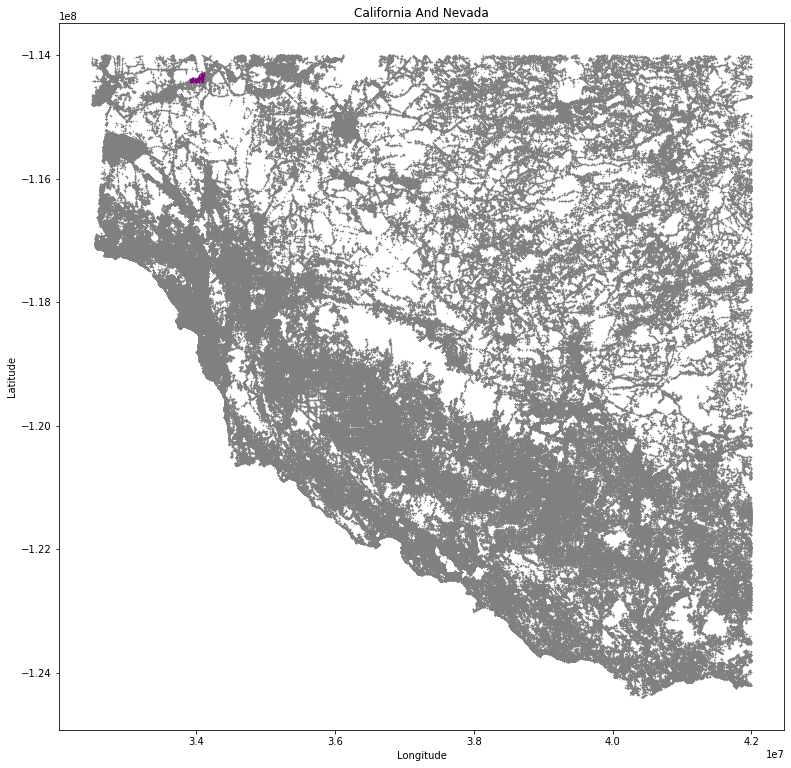

In [49]:
fig1 = plt.figure(figsize=(13,13))
ax1 = fig1.add_subplot(111)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California And Nevada')

ax1.scatter(time_dist_coord['longitude_1'], time_dist_coord['latitude_1'], color='gray', s = 0.1)
ax1.scatter(treshhold['longitude'], treshhold['latitude'], color = 'purple', marker='.', s = 0.1)

Now we want to show the graph of the nodes we have to reach them(big purple dots) and the nodes we have in treshhold(little gray ones) and the interface nodes(the little purple nodes):

In [54]:
G=nx.Graph()
G=nx.from_pandas_edgelist(needed_nodes,'Node1','Node2',edge_attr=['dist'])

C:\Users\melik\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


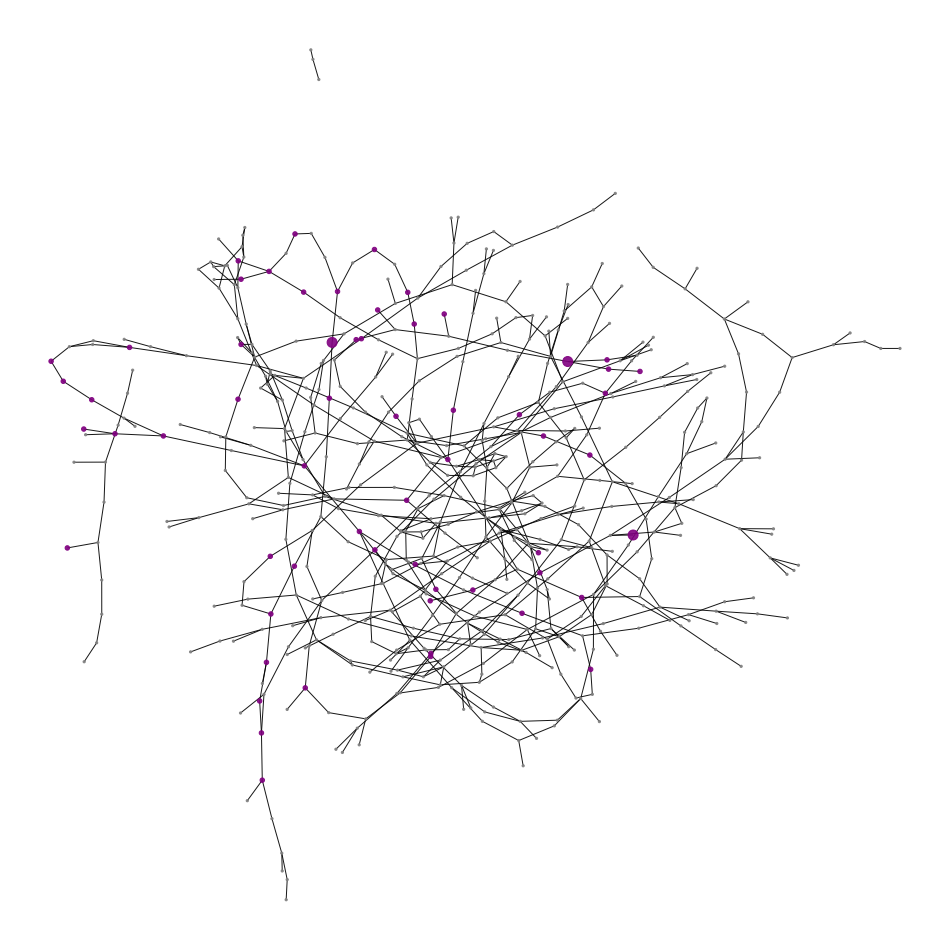

In [56]:
color_map = []
size_map =[]
for node in G:abs
    if node in input_nodes:
        color_map.append('purple')
        size_map.append(100)
    elif node in final_nodes:
        color_map.append('purple')
        size_map.append(20)
    else: 
        color_map.append('gray')
        size_map.append(5)

labels = nx.get_edge_attributes(G,'dist')

plt.figure(figsize=(13,13))
d = nx.degree(G)
nx.draw(G, node_size=size_map, alpha = 0.9,node_color = color_map, edge_labels=labels)
plt.show()

## Functionality III - Shortest Ordered Route - Visualization III - Visualize the Shortest Ordered Route

In [ ]:
distance= []
for i in range( len(cont)):
    distance.append(list(map(int,cont1[i][2:-1].split())))
distance

In [26]:
dist=pd.DataFrame(distance, columns= ['id_node1', 'id_node2', 'dist'])
dist.head()

,id_node1,id_node2,dist
0,1,1048577,456
1,1048577,1,456
2,2,1048578,2389
3,1048578,2,2389
4,3,1048579,358


In [27]:
import matplotlib.pyplot as plt

In [ ]:
cont2 = cont2[7:]
coord= []
for i in range(len(cont2)):
    coord.append(list(map(int,[x.split()[1:] for x in cont2][i])))
coord

In [40]:
coord=pd.DataFrame(coord, columns= ['node', 'latitude', 'longitude'])
coord.head()

,node,latitude,longitude
0,50,-114199582,33664244
1,51,-114400114,33990506
2,52,-114399560,33991644
3,53,-114396786,33989216
4,54,-114394696,33991642


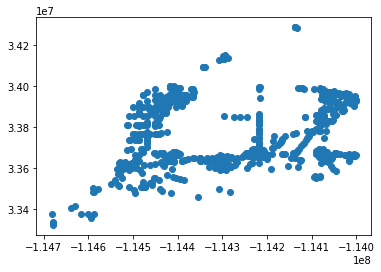

In [41]:
plt.scatter(coord['latitude'], coord['longitude'])

In [ ]:
def num_paths(coord):
    n_path = dict.fromkeys(G, 0.0)
    path = nx.all_pairs_shortest_path(coord)

    for source in G:
        for path in path[source].values():
            for node in path[1:]: 
                n_path[node] += 1 

    return n_spaths

In [ ]:
def coord(x, y):
    z = str(x) + "." + str(y)
    return z

B = {}
for x in range(0, h):
    for y in range(0, w):
        if arr[x][y] != 0:
            continue
        key = coord(x, y)
        B[key] = []
        if x - 1 >= 0 and arr[x - 1][y] == 0:
            value = coord(x - 1, y)
            B[key].append(value)
        if x + 1 < h and arr[x + 1][y] == 0:
            value = coord(x + 1, y)
            B[key].append(value)
        if y + 1 < w and arr[x][y + 1] == 0:
            value = coord(x, y + 1)
            B[key].append(value)
        if y - 1 >= 0 and arr[x][y - 1] == 0:
            value = coord(x, y - 1)
            B[key].append(value)